# AgroUS

Machine learning project for predicting Production, Supply and Distribution of World Agricultural Commodities

Dmitriy Khodykin d.hodikin@yandex.ru

In [1]:
# imports
import pandas
import matplotlib.pyplot as plt
import seaborn

## Import data

In [2]:
data = pandas.read_parquet('../data/data.parquet')

In [3]:
data.head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
0,0577400,GR,1990,1991,00,1,12,45400.0,"Almonds, Shelled Basis",Area Planted,(HA)
1,0577400,GR,1990,1991,00,4,12,41500.0,"Almonds, Shelled Basis",Area Harvested,(HA)
2,0577400,GR,1990,1991,00,17,10,15100.0,"Almonds, Shelled Basis",Bearing Trees,(1000 TREES)
3,0577400,GR,1990,1991,00,19,10,800.0,"Almonds, Shelled Basis",Non-Bearing Trees,(1000 TREES)
4,0577400,GR,1990,1991,00,16,10,15900.0,"Almonds, Shelled Basis",Total Trees,(1000 TREES)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410644 entries, 0 to 1410643
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   commodityCode    1410644 non-null  object 
 1   countryCode      1410644 non-null  object 
 2   marketYear       1410644 non-null  object 
 3   calendarYear     1410644 non-null  object 
 4   month            1410644 non-null  object 
 5   attributeId      1410644 non-null  int64  
 6   unitId           1410644 non-null  int64  
 7   value            1410644 non-null  float64
 8   commodityName    1410644 non-null  object 
 9   attributeName    1410644 non-null  object 
 10  unitDescription  1410644 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 129.1+ MB


## Analytics data

In [5]:
data['commodityName'].value_counts()

Sugar, Centrifugal          75760
Cotton                      55770
Wheat                       55650
Corn                        55215
Coffee, Green               53375
                            ...  
Orange Juice                 4653
Mixed Grain                  2655
Meal, Soybean (Local)        1260
Oilseed, Soybean (Local)     1260
Oil, Soybean (Local)         1200
Name: commodityName, Length: 64, dtype: int64

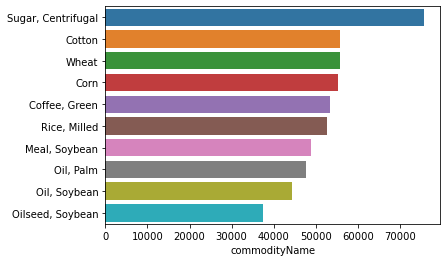

In [6]:
# Subset TOP-10 Commodities
top_10 = data['commodityName'].value_counts().head(10)

seaborn.barplot(
    x = top_10, 
    y = top_10.index
);

### Sugar

In [7]:
# Old periods
data[data['commodityName'] == 'Sugar, Centrifugal'].head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
1262030,0612000,AF,1990,1989,00,20,8,55.0,"Sugar, Centrifugal",Beginning Stocks,(1000 MT)
1262031,0612000,AF,1990,1989,00,30,8,3.0,"Sugar, Centrifugal",Beet Sugar Production,(1000 MT)
1262032,0612000,AF,1990,1989,00,43,8,7.0,"Sugar, Centrifugal",Cane Sugar Production,(1000 MT)
1262033,0612000,AF,1990,1989,00,28,8,10.0,"Sugar, Centrifugal",Production,(1000 MT)
1262034,0612000,AF,1990,1989,00,64,8,90.0,"Sugar, Centrifugal",Raw Imports,(1000 MT)


In [8]:
# New periods
data[data['commodityName'] == 'Sugar, Centrifugal'].tail()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
1337785,0612000,ZA,2019,2021,05,139,8,404.0,"Sugar, Centrifugal",Human Dom. Consumption,(1000 MT)
1337786,0612000,ZA,2019,2021,05,151,8,0.0,"Sugar, Centrifugal",Other Disappearance,(1000 MT)
1337787,0612000,ZA,2019,2021,05,126,8,404.0,"Sugar, Centrifugal",Total Disappearance,(1000 MT)
1337788,0612000,ZA,2019,2021,05,176,8,80.0,"Sugar, Centrifugal",Ending Stocks,(1000 MT)
1337789,0612000,ZA,2019,2021,05,178,8,520.0,"Sugar, Centrifugal",Total Distribution,(1000 MT)


In [13]:
# Production
sugar_production = data[(data['commodityName'] == 'Sugar, Centrifugal') & \
                        (data['attributeName'] == 'Production')]\
                        [['marketYear', 'calendarYear', 'month', 'value']]

print('Sugar Productions Data Rows:', len(sugar_production))

Sugar Productions Data Rows: 4735


In [30]:
sugar_production[sugar_production['marketYear'] == '2019'].tail(10)

,marketYear,calendarYear,month,value
1337633,2019,2018,11,0.0
1337649,2019,2020,05,25.0
1337665,2019,2018,11,0.0
1337681,2019,2020,05,250.0
1337697,2019,2020,11,1300.0
1337713,2019,2018,11,0.0
1337729,2019,2020,05,747.0
1337745,2019,2018,11,0.0
1337761,2019,2020,11,0.0
1337777,2019,2021,05,440.0


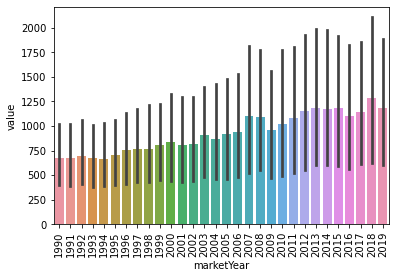

In [17]:
def show_barplot(data, x_label, y_label):
    """
    Show seaborn barplot.
    """
    seaborn.barplot(
        x = data[x_label], 
        y = data[y_label])
    plt.xticks(rotation=90)
    plt.show();

show_barplot(sugar_production, 'marketYear', 'value')